# DATA CLEANING

## 1. Importation

In [49]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns


In [30]:
import mysql.connector

import sys
sys.path.insert(0,"/home/apprenant/PycharmProjects/FoodFlix")

from src.d02_intermediate.first_cleaning import df_nutri_score_new as df
from src.d01_data.load_data import db_connect
import src.d00_utils.mysql_utils as ut

#db_connect = ut.connect_to_mysql()
#print(df)

                                 product_name countries  energy_100g  \
311648                      Usn Crunch Peanut    France       1690.0   
243499            Nougat tendre de Montélimar    France       1876.0   
273178  Moutarde saveur truffe au poivre noir    France        824.0   
188230                                  Datte    France       1347.0   
246747                                    NaN    France          NaN   
...                                       ...       ...          ...   
256255                    Merguez de volaille    France        901.0   
223141                      Edulcorant stevia    France        377.0   
198219                   Macédoine de légumes    France        161.0   
206985       Cornichons extra-fins, croquants    France          NaN   
212603       Le Lait de Chez Nous demi-écrémé    France        193.0   

        sugars_100g  fiber_100g  proteins_100g  sodium_100g  \
311648         31.0        3.20           24.0     0.393701   
243499   

## 2. Les types de données

je vérifie que les types de données sont cohérents avec les valeurs attendues.
aussi je vérifie la cohérence des noms de colonnes.

In [31]:
print(df.dtypes)

product_name                object
countries                   object
energy_100g                float64
sugars_100g                float64
fiber_100g                 float64
proteins_100g              float64
sodium_100g                float64
saturated-fat_100g         float64
nutrition-score-fr_100g    float64
nutrition_grade_fr          object
dtype: object


tout est cohérent il n'ya pas d'action à mener sur ce suejt.

## 3.Les données manquantes

je chercher à savoir si mes données présentent beaucoup de valeurs nulles.
j'affiche par ligne le nombre de colonnes non nulles.

In [32]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30105 entries, 311648 to 212603
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   product_name             29782 non-null  object 
 1   countries                30105 non-null  object 
 2   energy_100g              25599 non-null  float64
 3   sugars_100g              25121 non-null  float64
 4   fiber_100g               17051 non-null  float64
 5   proteins_100g            25531 non-null  float64
 6   sodium_100g              25106 non-null  float64
 7   saturated-fat_100g       25086 non-null  float64
 8   nutrition-score-fr_100g  24697 non-null  float64
 9   nutrition_grade_fr       24697 non-null  object 
dtypes: float64(7), object(3)
memory usage: 2.5+ MB
None


Sans nom de produit la donnée est inutilisable je peux donc supprimer les lignes qui ont un "produtc_name" sans valeur.
Nous pouvons nous permettre de garder les autres lignes meme si elles ont des valeurs vides, il faudra juste reflechir à comment  les remplir.

In [33]:
# si il n'y a pas de nom de produits je supprime les lignes
df = df[df['product_name'].notna()]
print(df.shape)

(29782, 10)


comme il s'agit ici de calculer un score, je remplace toutes les valeurs Nan par zéro.

In [34]:
df.tail()

product_name countries  energy_100g  sugars_100g  \
256255               Merguez de volaille    France        901.0          1.0   
223141                 Edulcorant stevia    France        377.0          0.0   
198219              Macédoine de légumes    France        161.0          0.8   
206985  Cornichons extra-fins, croquants    France          NaN          NaN   
212603  Le Lait de Chez Nous demi-écrémé    France        193.0          4.8   

        fiber_100g  proteins_100g  sodium_100g  saturated-fat_100g  \
256255         NaN           15.2     0.590551                 0.4   
223141         0.5            2.0    15.748031                 0.0   
198219         3.7            2.2     0.310000                 0.1   
206985         NaN            NaN          NaN                 NaN   
212603         NaN            3.2     0.051181                 1.0   

        nutrition-score-fr_100g nutrition_grade_fr  
256255                      3.0                  c  
223141                     11.0                  d  
198219                     -8.0                  a  
206985                      NaN                NaN  
212603                      0.0                  b

In [35]:
df = df.fillna(0)

In [36]:
df.tail()

product_name countries  energy_100g  sugars_100g  \
256255               Merguez de volaille    France        901.0          1.0   
223141                 Edulcorant stevia    France        377.0          0.0   
198219              Macédoine de légumes    France        161.0          0.8   
206985  Cornichons extra-fins, croquants    France          0.0          0.0   
212603  Le Lait de Chez Nous demi-écrémé    France        193.0          4.8   

        fiber_100g  proteins_100g  sodium_100g  saturated-fat_100g  \
256255         0.0           15.2     0.590551                 0.4   
223141         0.5            2.0    15.748031                 0.0   
198219         3.7            2.2     0.310000                 0.1   
206985         0.0            0.0     0.000000                 0.0   
212603         0.0            3.2     0.051181                 1.0   

        nutrition-score-fr_100g nutrition_grade_fr  
256255                      3.0                  c  
223141                     11.0                  d  
198219                     -8.0                  a  
206985                      0.0                  0  
212603                      0.0                  b

on constate que les Nan ont bien été modifiés.

### 3.1 Les lignes sans informations

TODO: faire la somme des valeurs pour chaque ligne si celle si est a 0 supprimer la ligne

## 4. Les doublons

Le choix des colonnes a garder s'est fait de manière empirique, il n'y peut donc pas y avoir de doublons.
Par contre je vérifie qu'il n'existe pas 2 lignes identiques sinon j'en supprime une des deux.

In [37]:
#print(df.info())

In [38]:
print(df[df.duplicated(keep=False)])

                       product_name countries  energy_100g  sugars_100g  \
246815                     Thé vert    France          0.0          0.0   
182158                      Houmous    France       1527.0          0.3   
273125              Fromage de tête    France          0.0          0.0   
217680  Camembert d'Isigny (22% MG)    France       1179.5          0.5   
247366      Légumes pour Pot au feu    France          0.0          0.0   
...                             ...       ...          ...          ...   
345236                   Café moulu    France          0.0          0.0   
260672            Rosé Pamplemousse    France          0.0          0.0   
258352         Couscous grain moyen    France       1506.0          2.0   
304424              Blanc de poulet    France        357.0          2.5   
312260               Haricots verts    France          0.0          0.0   

        fiber_100g  proteins_100g  sodium_100g  saturated-fat_100g  \
246815         0.0           

In [39]:
df.drop_duplicates(keep='last',inplace=True)

In [40]:
print(df[df.duplicated(keep=False)])

Empty DataFrame
Columns: [product_name, countries, energy_100g, sugars_100g, fiber_100g, proteins_100g, sodium_100g, saturated-fat_100g, nutrition-score-fr_100g, nutrition_grade_fr]
Index: []


## 5. Les données aberrantes

### 5.1 Les valeurs quantitatives ne peuvent être < 0 ni >100

les valeurs ne peuvent pas être négatives, si il y en a je les remplace par 0, et je reconsidérerait les valeurs à zéro plus loin.
les valeurs ne peuvent pas être >100 , si il y en a je les remplace par 100.

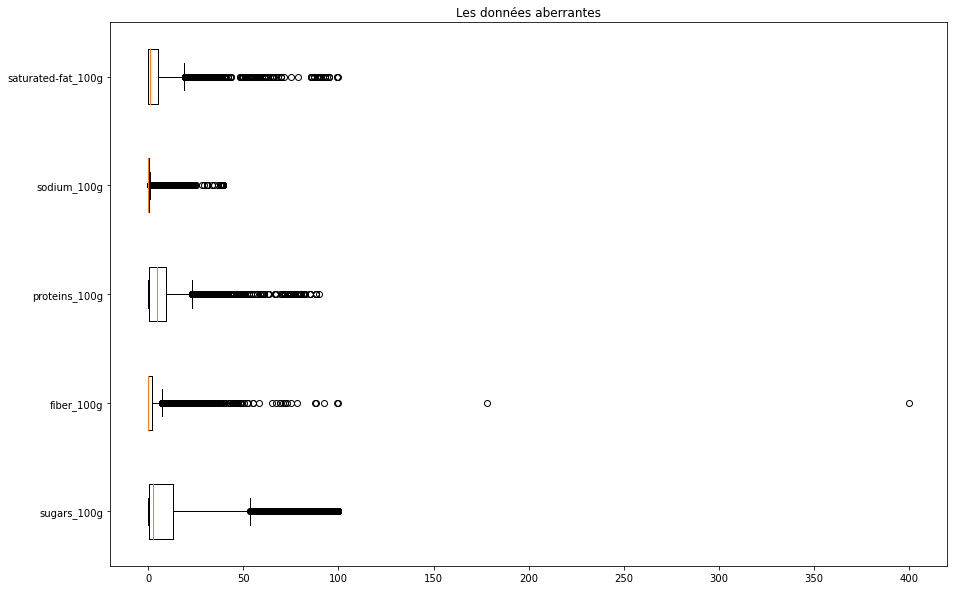

In [66]:
data = [df['sugars_100g'], df['fiber_100g'], df['proteins_100g'],df['sodium_100g'],df['saturated-fat_100g']]

plt.figure(figsize = (15,10))
ax = plt.boxplot(data, whis=[5,95], vert=False)

plt.title('Les données aberrantes')
plt.yticks([1, 2, 3,4,5], ['sugars_100g', 'fiber_100g', 'proteins_100g','sodium_100g','saturated-fat_100g' ])

plt.show()
   

dans un premier temps je supprime toutes les valeurs au dessus de 100, je les remplace par zéro.

In [73]:
columns=['sugars_100g','fiber_100g','proteins_100g','sodium_100g','saturated-fat_100g']

for col in columns:
    df.loc[df[col]> 100, col] = 0
    

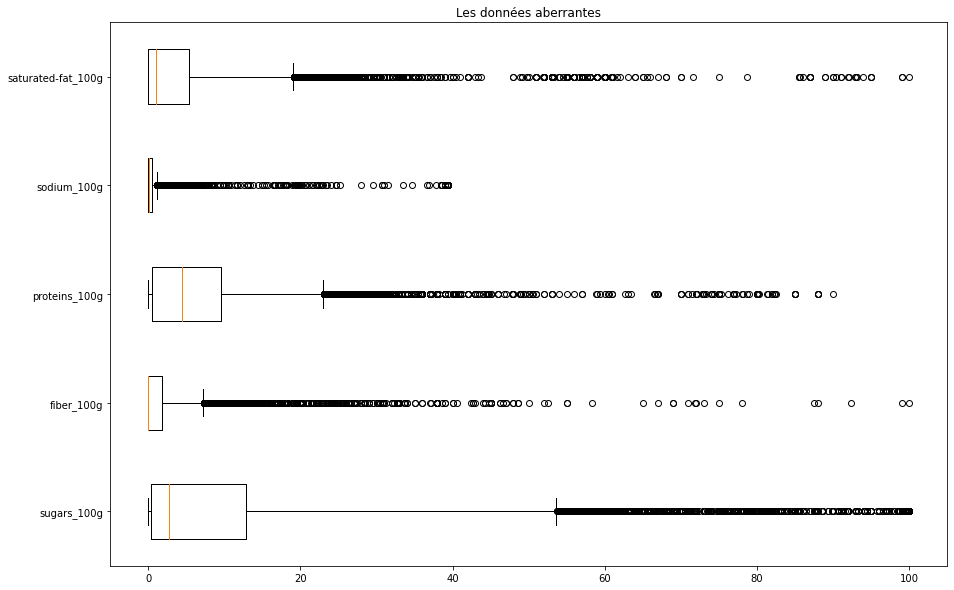

In [74]:
data = [df['sugars_100g'], df['fiber_100g'], df['proteins_100g'],df['sodium_100g'],df['saturated-fat_100g']]

plt.figure(figsize = (15,10))
ax = plt.boxplot(data, whis=[5,95], vert=False)

plt.title('Les données aberrantes')
plt.yticks([1, 2, 3,4,5], ['sugars_100g', 'fiber_100g', 'proteins_100g','sodium_100g','saturated-fat_100g' ])

plt.show()
   

on constate bien la disparition des valeurs supérieures à 100.

## La consistance des données

### vérifier les produits redondants

## Sauvegarde en SQL

In [2]:
# df_name = "clean_data"
# ut.save_to_mysql(db_connect, df_clean_data_new, df_name)